In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, Subset
import os
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from helper_plot import hdr_plot_style
#hdr_plot_style()
from torch.utils.tensorboard import SummaryWriter
%matplotlib ipympl


In [3]:
img = torch.randn(7,1,28,28)

nin = 1
encoding_dims = 16
latent_dims = 16
n_hidden = 128


encoder = nn.Sequential(
        nn.Conv2d(nin, 8, 3, stride=2, padding=1),
        nn.ReLU(True),

        nn.Conv2d(8, 16, 3, stride=2, padding=1),
        #nn.BatchNorm2d(16),
        nn.ReLU(True),

        nn.Conv2d(16, 32, 3, stride=2, padding=0),
        nn.ReLU(True),

        nn.Flatten(1),

        nn.Linear(3 * 3 * 32, n_hidden),
        nn.ReLU(True),

        nn.Linear(n_hidden, encoding_dims)
    )

# Decoder network
decoder = nn.Sequential(

        nn.Linear(encoding_dims, n_hidden),
        nn.ReLU(True),

        nn.Linear(n_hidden, 3 * 3 * 32),
        nn.ReLU(True),

        #Reshape((32, 3, 3,)),
        nn.Unflatten(1,(32, 3, 3)),

        nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0), 
        #nn.BatchNorm2d(16), 
        nn.ReLU(True),

        nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1), 
        #nn.BatchNorm2d(8),
        nn.ReLU(True),

        nn.ConvTranspose2d(8, nin, 3, stride=2, padding=1, output_padding=1), 
        nn.Sigmoid()
    )   



encoded = encoder(img)
encoded.shape




decoded = decoder(encoded)
decoded.shape

torch.Size([7, 1, 28, 28])

In [80]:
class TechnoDataset(Dataset):

    def __init__(self,
                 dat_location,
                 size=2**15) -> None:
        super().__init__()

        self.samples = np.memmap(
            dat_location,
            dtype="float32",
            mode="r",
        )
        self.samples = self.samples[:size * (len(self.samples) // size)]
        self.samples = self.samples.reshape(-1, 1, size)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        return torch.from_numpy(np.copy(self.samples[index])).float()

dataset = TechnoDataset("./data/TECHNO/techno_resampled.dat")

In [183]:
dataset_dir = './data'
valid_ratio = 0.9995
# Load the dataset for the training/validation sets
train_valid_dataset =  dataset
# Split it into training and validation sets
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset) +1)
nb_valid =  int(valid_ratio * len(train_valid_dataset))

train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])


# Prepare 
num_threads = 0     # Loading the dataset is using 4 CPU threads
batch_size  = 2   # Using minibatches of 128 samples
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=num_threads)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False, num_workers=num_threads)


In [184]:
print("The train set contains {} samples, in {} batches".format(len(train_loader.dataset), len(train_loader)))
print("The validation set contains {} samples, in {} batches".format(len(valid_loader.dataset), len(valid_loader)))

The train set contains 22 samples, in 11 batches
The validation set contains 42624 samples, in 21312 batches


C:\Users\quent\AppData\Local\Temp\ipykernel_5104\2162586758.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


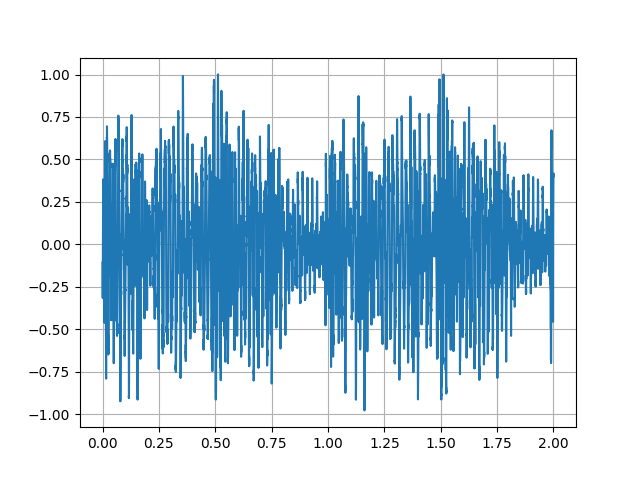

In [185]:
for i,x in enumerate(train_loader):
    echant_test = x[0]
    
test = echant_test[0].numpy()
Fe = len(test)/2
temps = np.arange(len(test))/Fe

plt.figure()
plt.plot(temps,test)
plt.grid()
plt.show()


In [186]:
32768/4/4/4/4

128.0

In [187]:
4*4*4*4

256

In [188]:

nin=1
encoding_dims = 128
n_hidden = 512


encoder = nn.Sequential(
        nn.Conv1d(nin, 16, 4, stride=4, padding=0),
        nn.ReLU(),
        

        nn.Conv1d(16, 32, 4,stride=4,  padding=0), 
        nn.ReLU(),

        nn.Conv1d(32, 64, 4,stride=4,  padding=0), 
        nn.ReLU(),

        nn.Conv1d(64, 128, 4,stride=2,  padding=1), 
        nn.ReLU(),

        #nn.Flatten(1),

        nn.Linear(32768//128, n_hidden),
        nn.ReLU(),

        nn.Linear(n_hidden, encoding_dims)
        )

    # Decoder network
decoder = nn.Sequential(
    nn.Linear(encoding_dims,n_hidden), 
        nn.ReLU(),

        nn.Linear(n_hidden, 32768//128), 
        nn.ReLU(),

        #nn.Unflatten(1,(128, 32768//128)),

        nn.ConvTranspose1d(128, 64,  4,stride=2,  padding=1), 
        nn.ReLU(),

        nn.ConvTranspose1d(64, 32,  4,stride=4,  padding=0), 
        nn.ReLU(),

        nn.ConvTranspose1d(32, 16, 4,stride=4,  padding=0), 
        nn.ReLU(),

        nn.ConvTranspose1d(16, nin, 4,stride=4,  padding=0), 
        nn.Sigmoid()

        
    )
print(echant_test.shape)
encode = encoder(echant_test)
print(encode.shape)


decoded = decoder(encode)
print(decoded.shape)

torch.Size([1, 32768])
torch.Size([128, 128])
torch.Size([1, 32768])


In [189]:
nn.Unflatten(1,(128, 32768//128, 32768//128)),

        nn.ConvTranspose1d(128, 64,  4,stride=2,  padding=1), 
        nn.ReLU(),

        nn.ConvTranspose1d(64, 32,  4,stride=4,  padding=0), 
        nn.ReLU(),

        nn.ConvTranspose1d(32, 16, 4,stride=4,  padding=0), 
        nn.ReLU(),

        nn.ConvTranspose1d(16, nin, 4,stride=4,  padding=0), 
        nn.Sigmoid()

IndentationError: unexpected indent (2226670208.py, line 3)

In [ ]:
print(encoder)

Sequential(
  (0): Conv1d(1, 16, kernel_size=(4,), stride=(4,))
  (1): ReLU()
  (2): Conv1d(16, 32, kernel_size=(4,), stride=(4,))
  (3): ReLU()
  (4): Conv1d(32, 64, kernel_size=(4,), stride=(4,))
  (5): ReLU()
  (6): Conv1d(64, 128, kernel_size=(4,), stride=(2,), padding=(1,))
  (7): ReLU()
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=256, out_features=512, bias=True)
  (10): ReLU()
  (11): Linear(in_features=512, out_features=128, bias=True)
)


In [ ]:
32768/128


256.0